<a href="https://colab.research.google.com/github/wolframalexa/humanities-data-analysis/blob/main/chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code from book

import re


PUNCT_RE = re.compile(r'[^\w\s]+$')


def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.
    Arguments:
        string (str): a string to check for punctuation markers.
    Returns:
        bool: True is string is a (sequence of) punctuation marker(s),
            False otherwise.
    Examples:
        >>> is_punct("!")
        True
        >>> is_punct("Bonjour!")
        False
        >>> is_punct("¿Te gusta el verano?")
        False
        >>> is_punct("...")
        True
        >>> is_punct("«»...")
        True
    """
    return PUNCT_RE.match(string) is not None

In [5]:
corpus = ["D'où me vient ce désordre, Aufide, et que veut dire",
          "Madame, il était temps qu'il vous vînt du secours:",
          "Ah! Monsieur, c'est donc vous?",
          "Ami, j'ai beau rêver, toute ma rêverie",
          "Ne me parle plus tant de joie et d'hyménée;",
          "Il est vrai, Cléobule, et je veux l'avouer,",
          "Laisse-moi mon chagrin, tout injuste qu'il est;",
          "Ton frère, je l'avoue, a beaucoup de mérite;",
          "J'en demeure d'accord, chacun a sa méthode;",
          'Pour prix de votre amour que vous peignez extrême,']


# %%
document = corpus[2]
print(document.split())


# %%
import nltk
import nltk.tokenize

# download the most recent punkt package
nltk.download('punkt', quiet=True)

document = corpus[3]
print(nltk.tokenize.word_tokenize(document, language='french'))

['Ah!', 'Monsieur,', "c'est", 'donc', 'vous?']
['Ami', ',', "j'ai", 'beau', 'rêver', ',', 'toute', 'ma', 'rêverie']


In [6]:
tokens = nltk.tokenize.word_tokenize(corpus[2], language='french')

# Loop with a standard for-loop
tokenized = []
for token in tokens:
    if not is_punct(token):
        tokenized.append(token)
print(tokenized)

# Loop with a list comprehension
tokenized = [token for token in tokens if not is_punct(token)]
print(tokenized)

['Ah', 'Monsieur', "c'est", 'donc', 'vous']
['Ah', 'Monsieur', "c'est", 'donc', 'vous']


In [2]:
def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.
    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.
    Arguments:
        text (str): a string representing a text.
        language (str): a string specifying the language of text.
        lowercase (bool, optional): Set to True to lowercase all
            word tokens. Defaults to True.
    Returns:
        list: a list of word tokens extracted from text, excluding
            punctuation.
    Examples:
        >>> preprocess_text("Ah! Monsieur, c'est donc vous?", 'french')
        ["ah", "monsieur", "c'est", "donc", "vous"]
    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens

In [7]:
for document in corpus[2:4]:
    print('Original:', document)
    print('Tokenized:', preprocess_text(document, 'french'))


# %%
import collections

vocabulary = collections.Counter()
for document in corpus:
    vocabulary.update(preprocess_text(document, 'french'))


# %%
print(vocabulary.most_common(n=5))


# %%
print('Original vocabulary size:', len(vocabulary))
pruned_vocabulary = {token for token, count in vocabulary.items() if count > 1}
print(pruned_vocabulary)
print('Pruned vocabulary size:', len(pruned_vocabulary))


# %%
n = 5
print('Original vocabulary size:', len(vocabulary))
pruned_vocabulary = {token for token, _ in vocabulary.most_common()[n:]}
print('Pruned vocabulary size:', len(pruned_vocabulary))

Original: Ah! Monsieur, c'est donc vous?
Tokenized: ['ah', 'monsieur', "c'est", 'donc', 'vous']
Original: Ami, j'ai beau rêver, toute ma rêverie
Tokenized: ['ami', "j'ai", 'beau', 'rêver', 'toute', 'ma', 'rêverie']
[('et', 3), ('vous', 3), ('de', 3), ('me', 2), ('que', 2)]
Original vocabulary size: 66
{'a', 'je', 'que', 'et', 'vous', 'me', 'de', 'est', "qu'il", 'il'}
Pruned vocabulary size: 10
Original vocabulary size: 66
Pruned vocabulary size: 61


In [3]:
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.
    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.
    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.
    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']
    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)


In [8]:
tokenized_corpus = [preprocess_text(document, 'french') for document in corpus]
vocabulary = extract_vocabulary(tokenized_corpus)


# %%
bags_of_words = []
for document in tokenized_corpus:
    tokens = [word for word in document if word in vocabulary]
    bags_of_words.append(collections.Counter(tokens))

print(bags_of_words[2])


Counter({'ah': 1, 'monsieur': 1, "c'est": 1, 'donc': 1, 'vous': 1})


In [4]:
def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.
    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): An list of unique words.
    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.
    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]
    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

In [9]:
import numpy as np

document_term_matrix = corpus2dtm(tokenized_corpus, vocabulary)

document_term_matrix = np.array(document_term_matrix)
print(document_term_matrix.shape)

(10, 66)


In [20]:
import tarfile
import urllib.request
import os
import lxml.etree

url = 'http://raw.githubusercontent.com/wolframalexa/humanities-data-analysis/main/3-vector/theatre-classique.tar.gz'
path = urllib.request.urlopen(url)
tf = tarfile.open(fileobj=path, mode='r|gz')
tf.extractall('data')

subgenres = ('Comédie', 'Tragédie', 'Tragi-comédie')

plays, titles, genres = [], [], []
for fn in os.scandir('data/theatre-classique'):
    # Only include XML files
    if not fn.name.endswith('.xml'):
        continue
    tree = lxml.etree.parse(fn.path)
    genre = tree.find('//genre')
    title = tree.find('//title')
    if genre is not None and genre.text in subgenres:
        lines = []
        for line in tree.xpath('//l|//p'):
            lines.append(' '.join(line.itertext()))
        text = '\n'.join(lines)
        plays.append(text)
        genres.append(genre.text)
        titles.append(title.text)

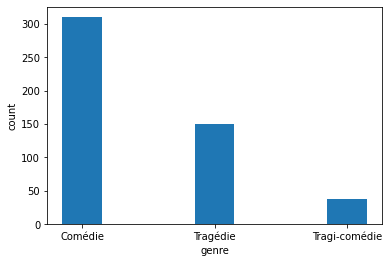

In [21]:
import matplotlib.pyplot as plt

counts = collections.Counter(genres)

fig, ax = plt.subplots()
ax.bar(counts.keys(), counts.values(), width=0.3)
ax.set(xlabel="genre", ylabel="count");

In [22]:
plays_tok = [preprocess_text(play, 'french') for play in plays]
vocabulary = extract_vocabulary(plays_tok, min_count=2)
document_term_matrix = np.array(corpus2dtm(plays_tok, vocabulary))

print(f"document-term matrix with "
      f"|D| = {document_term_matrix.shape[0]} documents and "
      f"|V| = {document_term_matrix.shape[1]} words.")

document-term matrix with |D| = 498 documents and |V| = 48097 words.


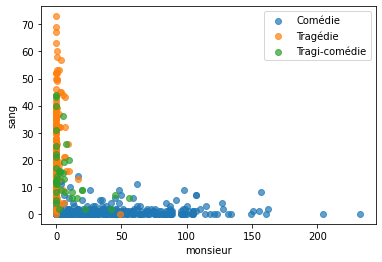

In [24]:
monsieur_idx = vocabulary.index('monsieur')
sang_idx = vocabulary.index('sang')

monsieur_counts = document_term_matrix[:, monsieur_idx]
sang_counts = document_term_matrix[:, sang_idx]

genres = np.array(genres)

fig, ax = plt.subplots()

for genre in ('Comédie', 'Tragédie', 'Tragi-comédie'):
    ax.scatter(monsieur_counts[genres == genre],
               sang_counts[genres == genre],
               label=genre, alpha=0.7)

ax.set(xlabel='monsieur', ylabel='sang')
plt.legend();

In [25]:
tr_means = document_term_matrix[genres == 'Tragédie'].mean(axis=0)
co_means = document_term_matrix[genres == 'Comédie'].mean(axis=0)
tc_means = document_term_matrix[genres == 'Tragi-comédie'].mean(axis=0)


print(tr_means.shape)

(48097,)


Mean absolute frequency of "monsieur"
   in comédies: 45.46
   in tragédies: 1.20
   in tragi-comédies: 8.13


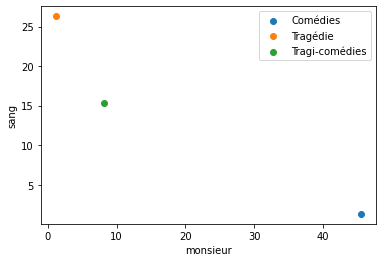

In [26]:
print('Mean absolute frequency of "monsieur"')
print(f'   in comédies: {co_means[monsieur_idx]:.2f}')
print(f'   in tragédies: {tr_means[monsieur_idx]:.2f}')
print(f'   in tragi-comédies: {tc_means[monsieur_idx]:.2f}')


fig, ax = plt.subplots()

ax.scatter(
    co_means[monsieur_idx], co_means[sang_idx], label='Comédies')
ax.scatter(
    tr_means[monsieur_idx], tr_means[sang_idx], label='Tragédie')
ax.scatter(
    tc_means[monsieur_idx], tc_means[sang_idx], label='Tragi-comédies')

ax.set(xlabel='monsieur', ylabel='sang')
plt.legend();

The word "sang" (*blood*) occurs far more often in tragedies than in comedies, with "monsieur" (*sir* or *Mr*) occuring far more often in comedies than tragedies.

In [27]:
tragedy = np.array([tr_means[monsieur_idx], tr_means[sang_idx]])
comedy = np.array([co_means[monsieur_idx], co_means[sang_idx]])
tragedy_comedy = np.array([tc_means[monsieur_idx], tc_means[sang_idx]])

def euclidean_distance(a, b):
    """Compute the Euclidean distance between two vectors.
    Note: ``numpy.linalg.norm(a - b)`` performs the
    same calculation using a slightly faster method.
    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.
    Returns:
        float: The euclidean distance between vector a and b.
    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(euclidean_distance(a, b), 2)
        3.87
    """
    return np.sqrt(np.sum((a - b) ** 2))

In [28]:
tc = euclidean_distance(tragedy, comedy)
print(f'tragédies - comédies:       {tc:.2f}')

ttc = euclidean_distance(tragedy, tragedy_comedy)
print(f'tragédies - tragi-comédies: {ttc:.2f}')

ctc = euclidean_distance(comedy, tragedy_comedy)
print(f' comédies - tragi-comédies: {ctc:.2f}')

tragédies - comédies:       50.84
tragédies - tragi-comédies: 12.98
 comédies - tragi-comédies: 39.88


Tragedies are more similar to tragicomedies than they are to comedies, and tragicomedies seem to veer more towards the "tragedy" than the "comedy".

In [29]:
def vector_len(v):
    """Compute the length (or norm) of a vector."""
    return np.sqrt(np.sum(v ** 2))


# %%
def cosine_distance(a, b):
    """Compute the cosine distance between two vectors.
    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.
    Returns:
        float: cosine distance between vector a and b.
    Note:
        See also scipy.spatial.distance.cdist
    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(cosine_distance(a, b), 2)
        0.09
    """
    return 1 - np.dot(a, b) / (vector_len(a) * vector_len(b))

In [30]:
tc = cosine_distance(tragedy, comedy)
print(f'tragédies - comédies:       {tc:.2f}')

ttc = cosine_distance(tragedy, tragedy_comedy)
print(f'tragédies - tragi-comédies: {ttc:.2f}')

ctc = cosine_distance(comedy, tragedy_comedy)
print(f' comédies - tragi-comédies: {ctc:.2f}')

tragédies - comédies:       0.93
tragédies - tragi-comédies: 0.10
 comédies - tragi-comédies: 0.51


Using the cosine distance, we find a similar pattern of relationships.

In [31]:
def city_block_distance(a, b):
    """Compute the city block distance between two vectors.
    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.
    Returns:
        {int, float}: The city block distance between vector a and b.
    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> city_block_distance(a, b)
        7
    """
    return np.abs(a - b).sum()

In [32]:
tc = city_block_distance(tragedy, comedy)
print(f'tragédies - comédies:       {tc:.2f}')

ttc = city_block_distance(tragedy, tragedy_comedy)
print(f'tragédies - tragi-comédies: {ttc:.2f}')

ctc = city_block_distance(comedy, tragedy_comedy)
print(f' comédies - tragi-comédies: {ctc:.2f}')

tragédies - comédies:       69.27
tragédies - tragi-comédies: 17.90
 comédies - tragi-comédies: 51.37


This pattern of relationships persists with the Manhattan distance.

In [33]:
import scipy.spatial.distance as dist

genre_vectors = {'tragédie': tr_means, 'comédie': co_means, 'tragi-comédie': tc_means}
metrics = {'cosine': dist.cosine, 'manhattan': dist.cityblock, 'euclidean': dist.euclidean}

import itertools

for metric_name, metric_fn in metrics.items():
    print(metric_name)
    for v1, v2 in itertools.combinations(genre_vectors, 2):
        distance = metric_fn(genre_vectors[v1], genre_vectors[v2])
        print(f'   {v1} - {v2}: {distance:.2f}')

cosine
   tragédie - comédie: 0.04
   tragédie - tragi-comédie: 0.01
   comédie - tragi-comédie: 0.03
manhattan
   tragédie - comédie: 7134.45
   tragédie - tragi-comédie: 5162.44
   comédie - tragi-comédie: 8139.96
euclidean
   tragédie - comédie: 355.13
   tragédie - tragi-comédie: 250.37
   comédie - tragi-comédie: 503.64


Cosine length automatically normalizes by text length but Manhattan and Euclidean do not, which is why cosine is generally preferred for text analysis.

In [34]:
def nearest_neighbors(X, metric='cosine'):
    """Retrieve the nearest neighbor for each row in a 2D array.
    Arguments:
        X (numpy.ndarray): a 2D array.
        metric (str): the distance metric to be used,
            one of: 'cosine', 'manhattan', 'euclidean'
    Returns:
        neighbors (list): A list of integers, corresponding to
            the index of each row's nearest neighbor.
    Examples:
        >>> X = np.array([[1, 4, 2], [5, 5, 1], [1, 2, 1]])
        >>> nearest_neighbors(X, metric='manhattan')
        [1, 0, 0]
    """
    distances = dist.pdist(X, metric=metric)
    distances = dist.squareform(distances)
    np.fill_diagonal(distances, np.inf)
    return distances.argmin(1)

In [35]:
neighbor_indices = nearest_neighbors(document_term_matrix)

nn_genres = genres[neighbor_indices]
print(nn_genres[:5])

['Comédie' 'Tragédie' 'Comédie' 'Tragi-comédie' 'Tragi-comédie']


In [36]:
overlap = np.sum(genres == nn_genres)
print(f'Matching pairs (normalized): {overlap / len(genres):.2f}')

Maching pairs (normalized): 0.90


In [37]:
print(collections.Counter(nn_genres[genres == 'Tragédie']).most_common())
print(collections.Counter(nn_genres[genres == 'Comédie']).most_common())
print(collections.Counter(nn_genres[genres == 'Tragi-comédie']).most_common())


[('Tragédie', 130), ('Tragi-comédie', 16), ('Comédie', 4)]
[('Comédie', 299), ('Tragédie', 6), ('Tragi-comédie', 5)]
[('Tragi-comédie', 20), ('Comédie', 9), ('Tragédie', 9)]


Mean distance to comédie vector: 0.060
Mean distance to tragédie vector: 0.042


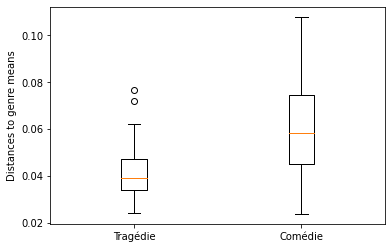

In [39]:
# tc distance to t and c vectors

t_dists, c_dists = [], []
for tc in document_term_matrix[genres == 'Tragi-comédie']:
    t_dists.append(cosine_distance(tc, tr_means))
    c_dists.append(cosine_distance(tc, co_means))

print(f'Mean distance to comédie vector: {np.mean(c_dists):.3f}')
print(f'Mean distance to tragédie vector: {np.mean(t_dists):.3f}')

fig, ax = plt.subplots()
ax.boxplot([t_dists, c_dists])
ax.set(xticklabels=('Tragédie', 'Comédie'), ylabel='Distances to genre means');


Two outliers - have a far greater difference from tragedy mean - worth further investigation.

In [40]:
t_dists = np.array(t_dists)
outliers = t_dists.argsort()[::-1][:2]
tc_titles = np.array(titles)[genres == 'Tragi-comédie']
print('\n'.join(tc_titles[outliers]))

STRATONICE, TRAGI-COMÉDIE
BÉRÉNICE, TRAGI-COMÉDIE EN PROSE.


In [59]:
# My code from here

import csv
import urllib.request

letters, years = [], []
url = 'http://raw.githubusercontent.com/wolframalexa/humanities-data-analysis/main/3-vector/chain-letters.csv'
data = urllib.request.urlopen(url);
lines = [l.decode('utf-8') for l in data.readlines()]
reader = csv.DictReader(lines)

for row in reader:
    letters.append(row["letter"])
    years.append(int(row["year"]))

In [65]:
# Easy
# Tokenized version of corpus
tokenized_letters = []
for letter in letters:
  t = preprocess_text(letter, 'english')
  tokenized_letters.append(t)

# Vocabulary of corpus
vocabulary = extract_vocabulary(tokenized_letters)
print("Unique words:", len(vocabulary))

Unique words: 5232


In [67]:
dtm = corpus2dtm(tokenized_letters, vocabulary)
dtm = np.array(dtm)
print(dtm.shape) # 5232 word tokens in the corpus and 554 documents

(554, 5232)


In [69]:
wpl = np.mean(np.sum(dtm, axis=1)) # sum along rows and average words per letter
print("Average words per letter", wpl)

Average words per letter 212.30324909747293


In [74]:
# Moderate
years = np.array(years)
post50 = years >= 1950
pre50 = years < 1950

texts_pre_50 = dtm[pre50,]
texts_post_50 = dtm[post50,]

print("Average length pre-1950:", np.mean(np.sum(texts_pre_50, axis=1)))
print("Average length post-1950:", np.mean(np.sum(texts_post_50, axis=1)))

Average length pre-1950: 117.25087108013938
Average length post-1950: 314.4756554307116


Chain letters seem to have gotten longer over the years.

[Text(0.5, 1.0, 'Length of chain letters by year')]

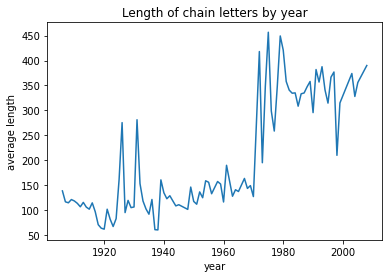

In [105]:
years_info = np.unique(years, return_counts=True)
unique_years = years_info[0]
count_years = years_info[1]

indices = []
i = 0
for num in count_years:
  i += num
  indices.append(i)
indices = indices[:-1] # remove last element

by_year = np.split(dtm, indices, axis=0)
avg_by_year = []
for ary in by_year:
  avg_by_year.append(np.mean(np.sum(ary, axis=1)))


fig, ax = plt.subplots()

ax.plot(unique_years,avg_by_year)

ax.set(xlabel='year', ylabel='average length')
ax.set(title="Length of chain letters by year")

There is a sharp rise in chain letter length around 1970.

In [115]:
# How religious are the letters? Look at "Jesus" and "works" in letters pre- and
# post-1950

j = vocabulary.index("jesus")
w = vocabulary.index("works")

jesus_pre50 = np.sum(texts_pre_50[:,j])
works_pre50 = np.sum(texts_pre_50[:,w])

jesus_post50 = np.sum(texts_post_50[:,j])
works_post50 = np.sum(texts_post_50[:,w])

print(f"Jesus before 1950: {jesus_pre50}, Jesus after 1950: {jesus_post50}")
print(f"works before 1950: {works_pre50}, works after 1950: {works_post50}")

Jesus before 1950: 167, Jesus after 1950: 5
works before 1950: 1, works after 1950: 149


In [118]:
# Challenging
# cosine distance bt oldest & youngest letters
oldest = dtm[0,:]
youngest = dtm[-1,:]
print("Oldest and youngest:", cosine_distance(oldest, youngest))

# cosine distance bt two of oldest
print("Two of oldest", cosine_distance(dtm[0,:], dtm[1, :]))

# two of youngest
print("Two of youngest", cosine_distance(dtm[-1,:], dtm[-2,:]))

Oldest and youngest: 0.5413279715619852
Two of oldest 0.29174338204815886
Two of youngest 0.15220451539032498


In [130]:
# cosine distance between all letters
all_dist = dist.pdist(dtm,metric='cosine')
all_dist = dist.squareform(all_dist)
print("Mean distance between all letters:", np.mean(all_dist))

pre50 = dist.pdist(texts_pre_50,metric='cosine')
pre50 = dist.squareform(pre50)
print("Mean distance between letters before 1950:", np.mean(pre50))

post50 = dist.pdist(texts_post_50,metric='cosine')
post50 = dist.squareform(post50)
print("Mean distance between letters after 1950:", np.mean(post50))

Mean distance between all letters: 0.414634546323987
Mean distance between letters before 1950: 0.45762465273123004
Mean distance between letters after 1950: 0.2109700404046367


Letters before 1950 are about as similar as the corpus overall. However, letters after 1950 are more different from one another - showing a greater variety of topics in chain letters, perhaps.

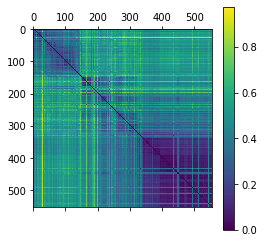

In [134]:
# Plot matrix

plt.matshow(all_dist)
plt.colorbar()
# larger numbers are later letters

Larger numbers correspond to later letters. We can see several clusters - one small one at the start and one larger one at the end. We can see that chain letters start and end dissimilarly, but there are similarities between approximately the 20th chain letter and all chain letters. This one in particular could be a useful candidate for further research.